<div style="
background:#141414;
padding:30px;
border-left:8px solid #E50914;
">
<h1 style="
font-family:'Helvetica Neue', Arial;
font-size:55px;
color:white;
text-align:left;
font-weight:bold;">
<span style="color:#E50914;">N</span>ETFLIX WEB SERIES
</h1>
</div>


<div style="background-color:#111; padding:20px; border-radius:12px;">
<h1 style="
font-family:'Trebuchet MS';
font-size:50px;
color:#00ffff;
text-align:center;
font-weight:bold;
text-shadow:0 0 10px #00ffff, 0 0 20px #00ffff;">
IMPORT LIBRARIES
</h1>
</div>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
df=pd.read_csv(r"C:\Users\Shuhaib\Downloads\top_rated_2000webseries.csv")

In [3]:
df

,id,title,original_title,overview,premiere_date,popularity,genre,country_origin,original_language,rating,votes
0,1,Breaking Bad,Breaking Bad,"Walter White, a New Mexico chemistry teacher, ...",2008-01-20,108.7820,"Drama, Crime",United States,English,8.900,16556
1,2,Avatar: The Last Airbender,Avatar: The Last Airbender,"In a war-torn world of elemental magic, a youn...",2005-02-21,12.5347,"Animation, Action & Adventure, Sci-Fi & Fantasy",United States,English,8.800,4557
2,3,Arcane,Arcane,Amid the stark discord of twin cities Piltover...,2021-11-06,22.5739,"Animation, Sci-Fi & Fantasy, Drama, Action & A...",United States,English,8.800,5481
3,4,When Life Gives You Tangerines,폭싹 속았수다,"In Jeju, a spirited girl and a steadfast boy's...",2025-03-07,18.5771,Drama,South Korea,Korean,8.751,423
4,5,Frieren: Beyond Journey's End,葬送のフリーレン,Decades after her party defeated the Demon Kin...,2023-09-29,28.3761,"Animation, Action & Adventure, Drama, Sci-Fi &...",Japan,Japanese,8.735,565
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,The Three Sides of Ana,Tres veces Ana,"Over a road trip, triplets Ana Laura, Ana Leti...",2016-05-23,2.7459,"Soap, Drama",Mexico,Spanish,7.091,328
1996,1997,Power Rangers,Power Rangers,A team of teenagers with attitude are recruite...,1993-08-28,10.9899,"Action & Adventure, Sci-Fi & Fantasy, Kids",United States,English,7.100,812
1997,1998,MasterChef,MasterChef,This hit cooking competition series sees award...,2010-07-27,10.9557,Reality,United States,English,7.090,282
1998,1999,I Am Georgina,Soy Georgina,"Join Georgina Rodríguez — mom, influencer, bus...",2022-01-27,2.6178,Reality,Spain,Spanish,7.100,319


In [4]:
df.columns

Index(['id', 'title', 'original_title', 'overview', 'premiere_date',
       'popularity', 'genre', 'country_origin', 'original_language', 'rating',
       'votes'],
      dtype='object')

In [5]:
df.isnull().sum()

id                    0
title                 0
original_title        0
overview             20
premiere_date         0
popularity            0
genre                 0
country_origin        1
original_language     0
rating                0
votes                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   title              2000 non-null   object 
 2   original_title     2000 non-null   object 
 3   overview           1980 non-null   object 
 4   premiere_date      2000 non-null   object 
 5   popularity         2000 non-null   float64
 6   genre              2000 non-null   object 
 7   country_origin     1999 non-null   object 
 8   original_language  2000 non-null   object 
 9   rating             2000 non-null   float64
 10  votes              2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


In [7]:
categorical_cols=['overview','country_origin']
for col in categorical_cols:
    df[col]=df[col].fillna(df[col].mode()[0])
    

In [8]:
df.isnull().sum()

id                   0
title                0
original_title       0
overview             0
premiere_date        0
popularity           0
genre                0
country_origin       0
original_language    0
rating               0
votes                0
dtype: int64

In [9]:
df.drop(['id','title','original_title','premiere_date'],axis=1,inplace=True)
df

,overview,popularity,genre,country_origin,original_language,rating,votes
0,"Walter White, a New Mexico chemistry teacher, ...",108.7820,"Drama, Crime",United States,English,8.900,16556
1,"In a war-torn world of elemental magic, a youn...",12.5347,"Animation, Action & Adventure, Sci-Fi & Fantasy",United States,English,8.800,4557
2,Amid the stark discord of twin cities Piltover...,22.5739,"Animation, Sci-Fi & Fantasy, Drama, Action & A...",United States,English,8.800,5481
3,"In Jeju, a spirited girl and a steadfast boy's...",18.5771,Drama,South Korea,Korean,8.751,423
4,Decades after her party defeated the Demon Kin...,28.3761,"Animation, Action & Adventure, Drama, Sci-Fi &...",Japan,Japanese,8.735,565
...,...,...,...,...,...,...,...
1995,"Over a road trip, triplets Ana Laura, Ana Leti...",2.7459,"Soap, Drama",Mexico,Spanish,7.091,328
1996,A team of teenagers with attitude are recruite...,10.9899,"Action & Adventure, Sci-Fi & Fantasy, Kids",United States,English,7.100,812
1997,This hit cooking competition series sees award...,10.9557,Reality,United States,English,7.090,282
1998,"Join Georgina Rodríguez — mom, influencer, bus...",2.6178,Reality,Spain,Spanish,7.100,319


In [10]:
# dff=df.copy()
# dff

,overview,popularity,genre,country_origin,original_language,rating,votes
0,"Walter White, a New Mexico chemistry teacher, ...",108.7820,"Drama, Crime",United States,English,8.900,16556
1,"In a war-torn world of elemental magic, a youn...",12.5347,"Animation, Action & Adventure, Sci-Fi & Fantasy",United States,English,8.800,4557
2,Amid the stark discord of twin cities Piltover...,22.5739,"Animation, Sci-Fi & Fantasy, Drama, Action & A...",United States,English,8.800,5481
3,"In Jeju, a spirited girl and a steadfast boy's...",18.5771,Drama,South Korea,Korean,8.751,423
4,Decades after her party defeated the Demon Kin...,28.3761,"Animation, Action & Adventure, Drama, Sci-Fi &...",Japan,Japanese,8.735,565
...,...,...,...,...,...,...,...
1995,"Over a road trip, triplets Ana Laura, Ana Leti...",2.7459,"Soap, Drama",Mexico,Spanish,7.091,328
1996,A team of teenagers with attitude are recruite...,10.9899,"Action & Adventure, Sci-Fi & Fantasy, Kids",United States,English,7.100,812
1997,This hit cooking competition series sees award...,10.9557,Reality,United States,English,7.090,282
1998,"Join Georgina Rodríguez — mom, influencer, bus...",2.6178,Reality,Spain,Spanish,7.100,319


<div style="background-color:#111; padding:20px; border-radius:12px;">
<h1 style="
font-family:'Trebuchet MS';
font-size:50px;
color:#00ffff;
text-align:center;
font-weight:bold;
text-shadow:0 0 10px #00ffff, 0 0 20px #00ffff;">
ENCODING
</h1>
</div>


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
df['overview']=le.fit_transform(df['overview'])
df['genre']=le.fit_transform(df['genre'])
df['country_origin']=le.fit_transform(df['country_origin'])
df['original_language']=le.fit_transform(df['original_language'])

In [14]:
df

,overview,popularity,genre,country_origin,original_language,rating,votes
0,1839,108.7820,322,60,4,8.900,16556
1,954,12.5347,86,60,4,8.800,4557
2,408,22.5739,207,60,4,8.800,5481
3,921,18.5771,302,53,12,8.751,423
4,640,28.3761,80,38,11,8.735,565
...,...,...,...,...,...,...,...
1995,1241,2.7459,462,42,17,7.091,328
1996,253,10.9899,64,60,4,7.100,812
1997,1732,10.9557,415,60,4,7.090,282
1998,1050,2.6178,415,54,17,7.100,319


In [15]:
df.columns

Index(['overview', 'popularity', 'genre', 'country_origin',
       'original_language', 'rating', 'votes'],
      dtype='object')

<div style="background-color:#111; padding:20px; border-radius:12px;">
<h1 style="
font-family:'Trebuchet MS';
font-size:50px;
color:#00ffff;
text-align:center;
font-weight:bold;
text-shadow:0 0 10px #00ffff, 0 0 20px #00ffff;">
SCALING
</h1>
</div>


In [16]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)
x_scaled

array([[ 1.49700855,  5.16315569,  0.57737245, ..., -0.67827614,
         2.52986006,  8.71824798],
       [-0.04839289, -0.0554377 , -1.32035806, ..., -0.67827614,
         2.28861578,  1.98100797],
       [-1.001827  ,  0.48889448, -0.34736912, ..., -0.67827614,
         2.28861578,  2.49981868],
       ...,
       [ 1.3101634 , -0.14105214,  1.32520693, ..., -0.67827614,
        -1.8366615 , -0.41933381],
       [ 0.11924387, -0.59313869,  1.32520693, ...,  2.07463983,
        -1.81253707, -0.39855893],
       [ 0.42308551, -0.21828407,  1.23675339, ..., -0.67827614,
        -1.84631127, -0.2739096 ]])

<div style="background-color:#111; padding:20px; border-radius:12px;">
<h1 style="
font-family:'Trebuchet MS';
font-size:50px;
color:#00ffff;
text-align:center;
font-weight:bold;
text-shadow:0 0 10px #00ffff, 0 0 20px #00ffff;">
K-MEANS
</h1>
</div>


In [18]:
from sklearn.cluster import KMeans

C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

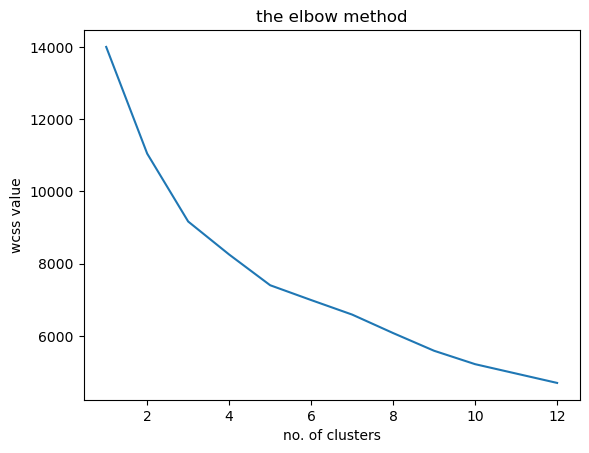

In [48]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('the elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss value')
plt.show()

In [49]:
kmeans=KMeans(n_clusters=2,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(x_scaled)

C:\Users\Shuhaib\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [50]:
y_kmeans

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [51]:
from sklearn.metrics import silhouette_score

In [52]:
score1 = silhouette_score(x_scaled, y_kmeans)
print("Silhouette Score:", score1)

Silhouette Score: 0.2571099257859737


<div style="background-color:#111; padding:20px; border-radius:12px;">
<h1 style="
font-family:'Trebuchet MS';
font-size:50px;
color:#00ffff;
text-align:center;
font-weight:bold;
text-shadow:0 0 10px #00ffff, 0 0 20px #00ffff;">
PCA
</h1>
</div>


In [24]:
from sklearn.decomposition import PCA

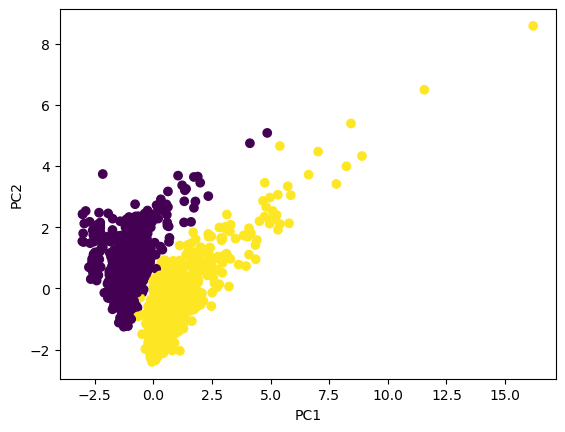

In [70]:
pca = PCA(n_components=2)
reduce = pca.fit_transform(x_scaled)

plt.scatter(reduce[:,0], reduce[:,1], c=kmeans.labels_)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [71]:
from sklearn.metrics import silhouette_score
score1 = silhouette_score(reduce,y_kmeans)

print("Silhouette Score:", score1)


Silhouette Score: 0.49358441651527724


<div style="background-color:#111; padding:20px; border-radius:12px;">
<h1 style="
font-family:'Trebuchet MS';
font-size:50px;
color:#00ffff;
text-align:center;
font-weight:bold;
text-shadow:0 0 10px #00ffff, 0 0 20px #00ffff;">
DBSCAN
</h1>
</div>


In [28]:
epsilon = 1000
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
labels = dbscan.fit_predict(reduce)

In [29]:
set(labels)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

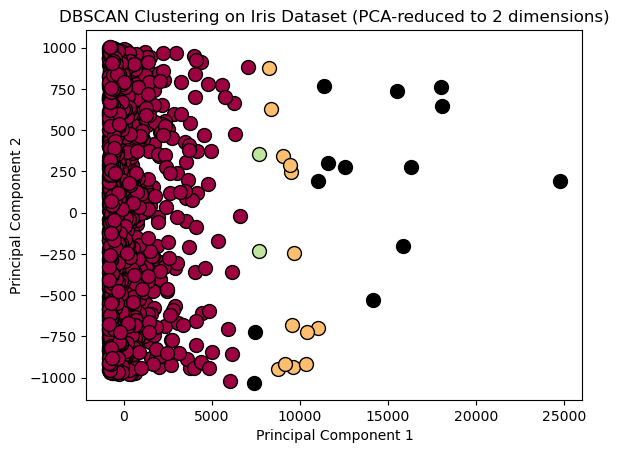

In [30]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  

    class_member_mask = (labels == k)
    xy = reduce[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
plt.title("DBSCAN Clustering on Iris Dataset (PCA-reduced to 2 dimensions)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [31]:
unique_labels

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

In [32]:
from sklearn.metrics import silhouette_score
score2 = silhouette_score(reduce,labels)

print("Silhouette Score:", score2)


Silhouette Score: 0.8107534091350506


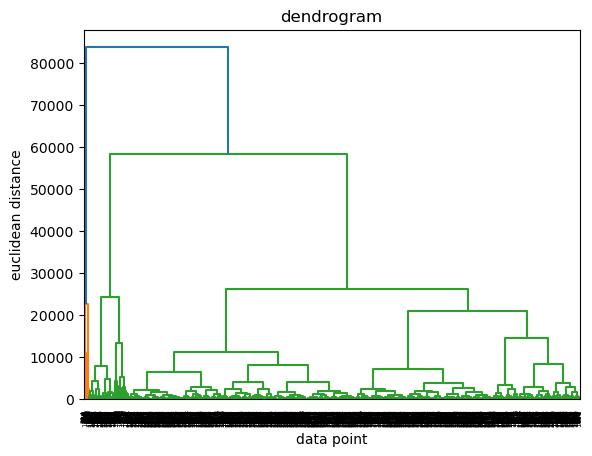

In [33]:
dendrogram=sch.dendrogram(sch.linkage(df,method='ward'))
plt.title('dendrogram')
plt.xlabel('data point')
plt.ylabel('euclidean distance')
plt.show()

<div style="background-color:#111; padding:20px; border-radius:12px;">
<h1 style="
font-family:'Trebuchet MS';
font-size:50px;
color:#00ffff;
text-align:center;
font-weight:bold;
text-shadow:0 0 10px #00ffff, 0 0 20px #00ffff;">
AGGLOMERATIVE
</h1>
</div>


In [55]:
ahc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage= 'ward')
y_ahc=ahc.fit_predict(reduce)

In [56]:
y_ahc

array([2, 3, 3, ..., 4, 0, 4])

In [58]:
score3 = silhouette_score(reduce,y_ahc)
score3

np.float64(0.4121953177978904)

<div style="background-color:#111; padding:20px; border-radius:12px;">
<h1 style="
font-family:'Trebuchet MS';
font-size:50px;
color:#00ffff;
text-align:center;
font-weight:bold;
text-shadow:0 0 10px #00ffff, 0 0 20px #00ffff;">
FUZZY
</h1>
</div>


In [60]:
import skfuzzy as fuzz
x_fuzzy=reduce.T
n_clusters=2
fuzziness=2.0
cntr,u,u0,d,jm,p,fpc=fuzz.cluster.cmeans(
    x_fuzzy,
    c=n_clusters,
    m=fuzziness,
    error=0.005,
    maxiter=1000,
    init=None
)

In [61]:
cluster_range = range(2, 7)
fpc_values = []            

for c in cluster_range:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        x_fuzzy,
        c=c,
        m=2,
        error=0.005,
        maxiter=1000
    )
    fpc_values.append(fpc)

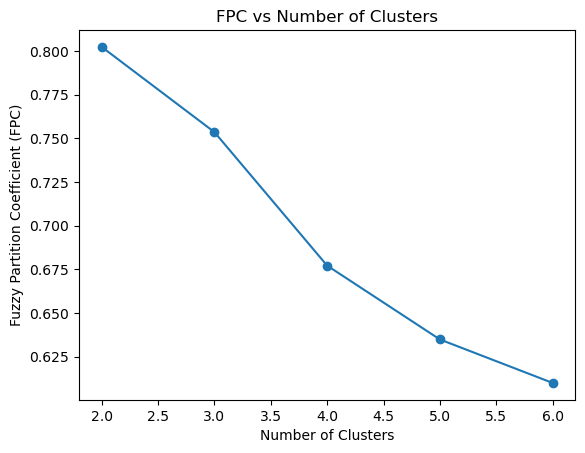

In [62]:
plt.figure()
plt.plot(cluster_range, fpc_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Fuzzy Partition Coefficient (FPC)")
plt.title("FPC vs Number of Clusters")
plt.show()

In [63]:
n_clusters=3
m=1.7
error=1e-5
maxiter=1000

In [64]:

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    reduce.T, c=2, m=2, error=0.005, maxiter=1000
)
u_transposed = u.T

hard_clusters = np.argmax(u_transposed, axis=1)

score4 = silhouette_score(reduce, hard_clusters)
print("Silhouette Score:",score4)

Silhouette Score: 0.4958787302929115


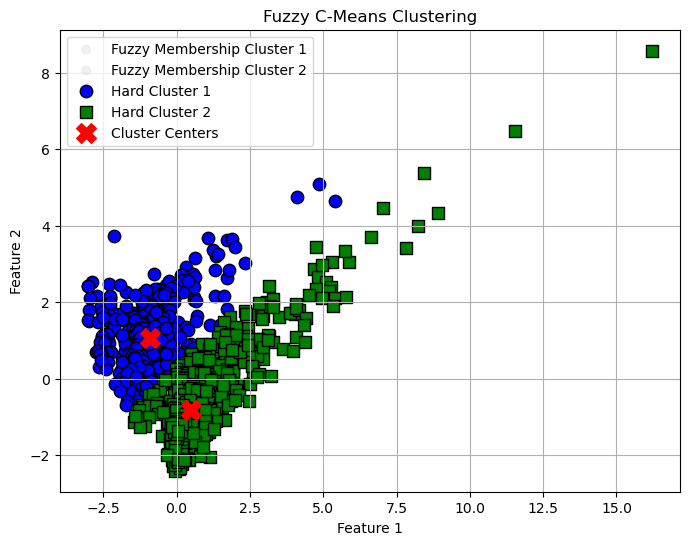

In [65]:
n_clusters = u.shape[0]  

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(n_clusters):
    ax.scatter(
        reduce[:, 0],
        reduce[:, 1],
        c=u[i],                
        cmap='coolwarm',
        alpha=0.4,
        label=f'Fuzzy Membership Cluster {i+1}'
    )
markers = ['o', 's', '^', 'D']
colors = ['blue', 'green', 'orange', 'purple']

for i in range(n_clusters):
    cluster_points = reduce[hard_clusters == i]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        c=colors[i],
        marker=markers[i],
        edgecolor='k',
        s=80,
        label=f'Hard Cluster {i+1}'
    )

ax.scatter(
    cntr[:, 0],
    cntr[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)

ax.set_title('Fuzzy C-Means Clustering')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left')
ax.grid(True)

plt.show()


<div style="background-color:#111; padding:20px; border-radius:12px;">
<h1 style="
font-family:'Trebuchet MS';
font-size:50px;
color:#00ffff;
text-align:center;
font-weight:bold;
text-shadow:0 0 10px #00ffff, 0 0 20px #00ffff;">
TABULATE
</h1>
</div>


In [66]:
from tabulate import tabulate

table = [
    ['Clustering Method', 'Silhouette Score'],
    ['KMeans', score1],
    ['DBSCAN', score2],
    ['Agglomerative', score3],
    ['Fuzzy C-Means', score4],
   
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════╤════════════════════╕
│ Clustering Method   │   Silhouette Score │
╞═════════════════════╪════════════════════╡
│ KMeans              │           0.25711  │
├─────────────────────┼────────────────────┤
│ DBSCAN              │           0.810753 │
├─────────────────────┼────────────────────┤
│ Agglomerative       │           0.412195 │
├─────────────────────┼────────────────────┤
│ Fuzzy C-Means       │           0.495879 │
╘═════════════════════╧════════════════════╛


In [69]:
df['DBSCAN_Cluster'] = labels 

# Numeric summary per cluster
cluster_summary = df.groupby('DBSCAN_Cluster')[['overview', 'popularity', 'genre', 'country_origin','original_language', 'rating', 'votes']].mean().round(2)
cluster_summary['Count'] = df['DBSCAN_Cluster'].value_counts()

print("WEB SERIES dataset (DBSACN c=3):")
print(cluster_summary)

WEB SERIES dataset (DBSACN c=3):
                overview  popularity   genre  country_origin  \
DBSCAN_Cluster                                                 
-1               1217.46       76.88  280.31           57.31   
 0                981.43       12.78  249.69           50.67   
 1                770.69       61.94  315.62           59.38   
 2               1099.00       49.22  126.50           60.00   

                original_language  rating     votes  Count  
DBSCAN_Cluster                                              
-1                           6.15    8.30  15203.08     13  
 0                           7.23    7.85    865.17   1972  
 1                           5.00    8.29  10499.46     13  
 2                           4.00    8.01   8711.00      2  


| **DBSCAN_Cluster** | **Key Characteristics (Average Values)**                                                                                                         | **Count** | **Conclusion / Interpretation**                                                                                                                                                                       |
| ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------------ | --------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **-1**            | High overview (1217.46), very high popularity (76.88), strong ratings (8.30), very high votes (15,203), moderate genre and country origin values | 13        | Represents **highly popular and critically well-received items**. Though small in size, this cluster includes top-performing items with strong audience engagement and detailed content descriptions. |
| **0**             | Moderate overview (981.43), low popularity (12.78), good ratings (7.85), low votes (865), balanced genre and language values                     | 1972      | This is the **dominant/mainstream cluster**, containing most items. It reflects average-performing items with stable ratings but limited popularity and engagement.                                   |
| **1**             | Lower overview (770.69), high popularity (61.94), highest genre value (315.62), strong ratings (8.29), high votes (10,499)                       | 13        | Indicates a **niche but highly engaging segment**, where items perform very well with audiences despite fewer total records. Suitable for targeted recommendations.                                   |
| **2**             | High overview (1099.00), moderate popularity (49.22), lower genre value (126.50), good ratings (8.01), high votes (8,711)                        | 2         | A **very small, specialized cluster** with well-rated and well-voted items that differ in genre and language characteristics, suggesting unique or exclusive content.                                 |
